In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

Выгружаем данные

In [12]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape

(1797, 64)

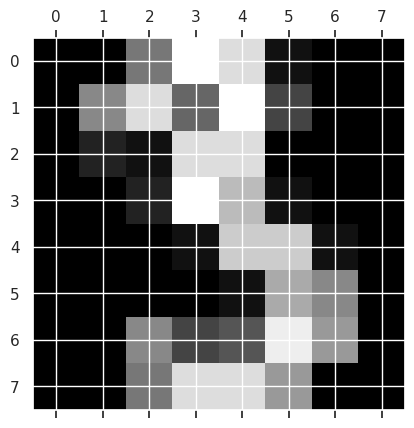

In [9]:
#plt.gray()
plt.matshow(digits.images[3])
plt.show()

Процируем данные в 2D пространство главных компонент

(1797, 64)
(1797, 2)


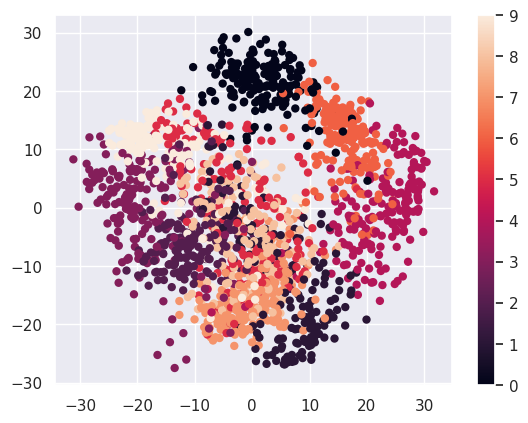

In [13]:
pca=PCA(2)
projected=pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

plt.scatter(projected[:,0],projected[:,1],c=digits.target,edgecolor='none')
plt.colorbar();

Выбираем количество главных компонент

1202.1477121607038


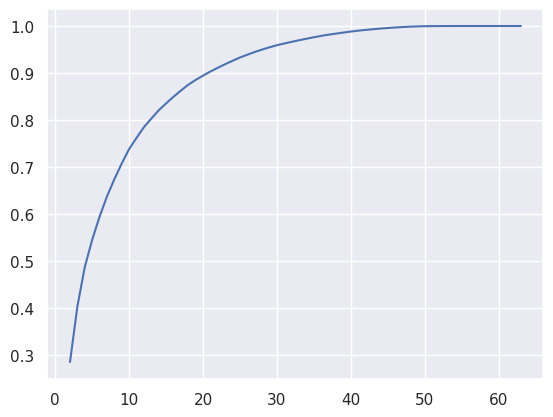

In [14]:

N=np.zeros(62)
var=np.zeros(62)
for i in range(62):
  N[i]=i+2
  pca = PCA(n_components=i+2)
  pca.fit(digits.data)
  #print(pca.explained_variance_)
  var[i]=np.sum(pca.explained_variance_)

print(max(var))
plt.plot(N,var/max(var))


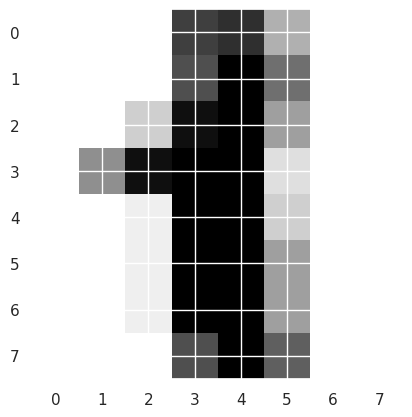

In [19]:


d=digits.data[1]
#D=np.zeros((8,8))
#for i in range(8):
#  for j in range(8):
#    D[i,j]=d[j + 8*i]

plt.imshow(d.reshape(8,8),cmap='binary')



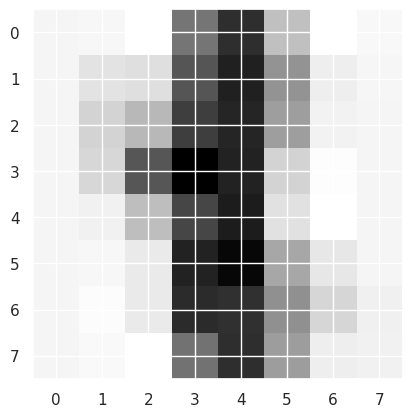

In [22]:
pca=PCA(n_components=20)
pca.fit(digits.data)
Digits_Pca=pca.transform(digits.data)
Digits_new=pca.inverse_transform(Digits_Pca)

dnew=Digits_new[1]
#Dnew=np.zeros((8,8))
#for i in range(8):
#  for j in range(8):
#    Dnew[i,j]=dnew[j + 8*i]


plt.imshow(dnew.reshape(8,8), cmap='binary')

Изображения главных компонент


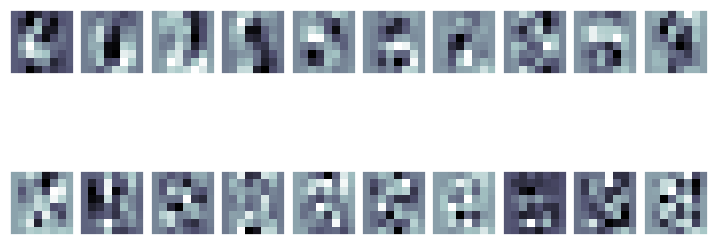

In [23]:
fig, axes = plt.subplots(2, 10, figsize=(9,4),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(pca.components_[i].reshape(8,8), cmap='bone')

Избавляемся от шума с помощью PCA

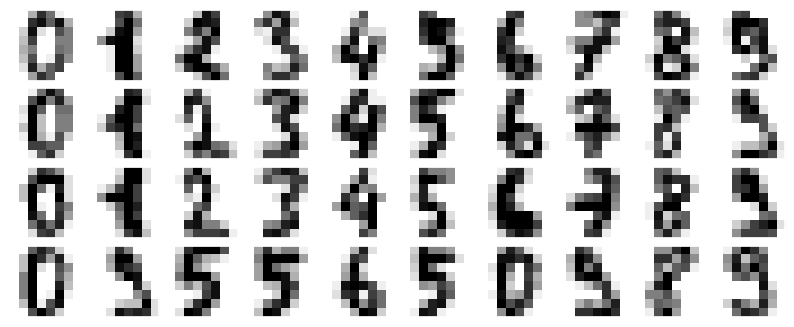

In [24]:
def plot_digits(data):
  fig, axes = plt.subplots(4,10,figsize=(10,4),subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
  for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(8,8),cmap='binary',interpolation='nearest',clim=(0,16))
plot_digits(digits.data)

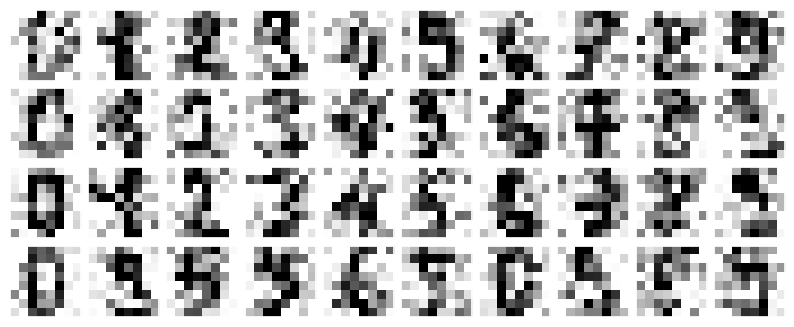

In [27]:
np.random.RandomState(1)
noisy=np.random.normal(digits.data,5)
plot_digits(noisy)

5


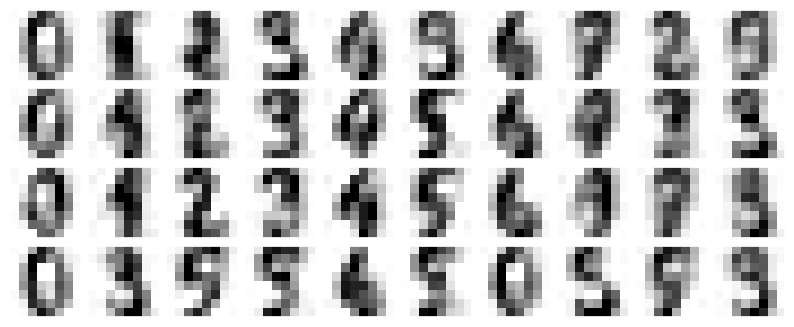

In [30]:
pca=PCA(0.25).fit(noisy)#проекция сохраняет (...) дисперсии!
print(pca.n_components_) #число компонент, при котором такой порог дисперсии сохраняется

components=pca.transform(noisy)
filtered=pca.inverse_transform(components)
plot_digits(filtered)